In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Train.csv to Train.csv
User uploaded file "Train.csv" with length 312881 bytes


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("Train.csv")
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [ ]:
df.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [ ]:
df.drop(columns=['ID'])

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671
...,...,...,...,...,...,...,...,...
3501,ds,2007,role-playing,Square Enix,E10+,1.702128,0.065421,3.584264
3502,3ds,2018,action,Nintendo,E10+,3.625000,0.090000,2.701472
3503,ps3,2012,action,Warner Bros. Interactive Entertainment,E10+,2.814815,0.172917,1.631668
3504,3ds,2016,simulation,Marvelous Entertainment,E10+,2.571429,0.464286,2.899156


In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 1.6MB 48.1MB/s 
     |████████████████████████████████| 6.8MB 43.3MB/s 
     |████████████████████████████████| 12.4MB 31.7MB/s 
     |████████████████████████████████| 1.2MB 45.7MB/s 
     |████████████████████████████████| 266kB 47.8MB/s 
     |████████████████████████████████| 65.9MB 63kB/s 
     |████████████████████████████████| 266kB 50.2MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 235kB 48.6MB/s 
     |████████████████████████████████| 552kB 50.9MB/s 
     |████████████████████████████████| 163kB 47.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 153kB 47.4MB/s 
     |████████████████████████████████| 6.0MB 39.5MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 1.1MB 48.8MB/s 

In [ ]:
from pycaret.regression import *
vgsp = setup(df, target= "SalesInMillions")

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5214
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(3506, 9)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,1.1090,2.7179,1.6282,0.2423,0.4632,3.6609,2.3352
1,Random Forest,1.1281,2.9104,1.6813,0.1952,0.4704,3.8445,2.3181
2,Light Gradient Boosting Machine,1.1431,2.9727,1.7022,0.1720,0.4781,3.7214,0.1232
3,Extreme Gradient Boosting,1.1197,3.0378,1.7152,0.1659,0.4657,3.7077,0.9055
4,Gradient Boosting Regressor,1.1217,3.0289,1.7134,0.1659,0.4660,3.7116,0.8710
5,Bayesian Ridge,1.1771,3.5220,1.8414,0.0628,0.4923,4.0126,0.1061
6,Orthogonal Matching Pursuit,1.2010,3.5606,1.8555,0.0434,0.4984,3.9953,0.0204
7,Ridge Regression,1.2115,3.5624,1.8568,0.0412,0.5033,3.9310,0.0198
8,TheilSen Regressor,1.2162,3.5979,1.8636,0.0368,0.5038,3.8918,179.4627
9,Huber Regressor,1.1543,3.6865,1.8823,0.0227,0.4808,3.6837,0.2259


In [ ]:
CBR = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0883,2.2325,1.4942,0.0648,0.4672,2.1929
1,1.0660,1.9683,1.4030,0.3092,0.4637,1.8393
2,1.1122,3.4938,1.8692,0.3208,0.4606,3.1827
3,1.1021,2.4568,1.5674,0.4078,0.4494,3.6794
4,1.1802,2.6288,1.6214,-0.1738,0.4911,4.7094
5,1.2044,4.3208,2.0787,0.2766,0.4806,10.6428
6,1.0407,2.1882,1.4793,0.3542,0.4318,1.6651
7,1.0314,1.7008,1.3041,0.1928,0.4492,1.6271
8,1.1573,4.1561,2.0387,0.3478,0.4665,3.5879
9,1.1074,2.0330,1.4258,0.3230,0.4724,3.4820


In [ ]:
!pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394120 sha256=9726e3d868bd7909af51ec5590452647e54bb14caf7949907ecb6352aaad489c
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


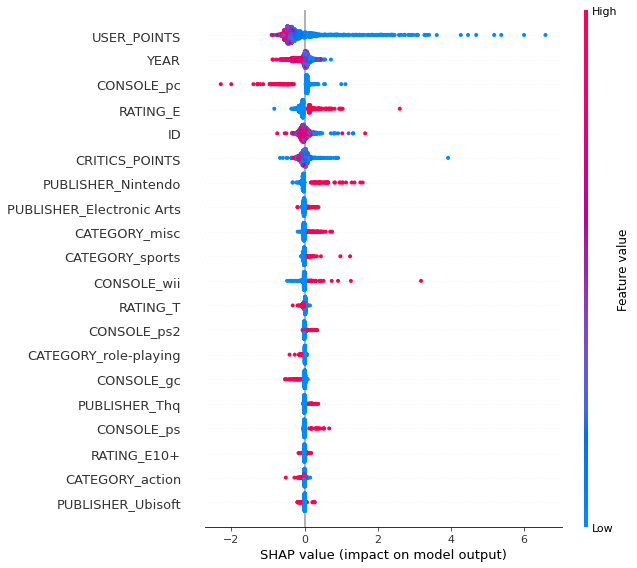

In [ ]:
interpret_model(CBR)

In [ ]:
predict_model(CBR)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.1647,8.4857,2.913,0.2894,0.4485,3.0581


,ID,YEAR,CRITICS_POINTS,USER_POINTS,CONSOLE_3ds,CONSOLE_dc,CONSOLE_ds,CONSOLE_gba,CONSOLE_gc,CONSOLE_pc,CONSOLE_ps,CONSOLE_ps2,CONSOLE_ps3,CONSOLE_ps4,CONSOLE_psp,CONSOLE_psv,CONSOLE_wii,CONSOLE_wiiu,CONSOLE_x,CONSOLE_x360,CONSOLE_xone,CATEGORY_action,CATEGORY_adventure,CATEGORY_fighting,CATEGORY_misc,CATEGORY_platform,CATEGORY_puzzle,CATEGORY_racing,CATEGORY_role-playing,CATEGORY_shooter,CATEGORY_simulation,CATEGORY_sports,CATEGORY_strategy,PUBLISHER_1C Company,PUBLISHER_3Do,PUBLISHER_505 Games,PUBLISHER_506 Games,PUBLISHER_5P,PUBLISHER_Acclaim Entertainment,PUBLISHER_Acquire,PUBLISHER_Activision,PUBLISHER_Activision Blizzard,PUBLISHER_Agatsuma Entertainment,PUBLISHER_Agetec,PUBLISHER_Aksys Games,PUBLISHER_Aq Interactive,PUBLISHER_Aqua Plus,PUBLISHER_Arc System Works,PUBLISHER_Ascaron Entertainment Gmbh,PUBLISHER_Ascii Entertainment,PUBLISHER_Aspyr,PUBLISHER_Atari,PUBLISHER_Atlus,PUBLISHER_Avalon Interactive,PUBLISHER_Bam! Entertainment,PUBLISHER_Banpresto,PUBLISHER_Bethesda Softworks,PUBLISHER_Bigben Interactive,PUBLISHER_Bitcomposer Games,PUBLISHER_Black Bean Games,PUBLISHER_Black Label Games,PUBLISHER_Blue Byte,PUBLISHER_Capcom,PUBLISHER_Cave,PUBLISHER_Cdv Software Entertainment,PUBLISHER_City Interactive,PUBLISHER_Cloud Imperium Games Corporation,PUBLISHER_Codemasters,PUBLISHER_Compile Heart,PUBLISHER_Crave Entertainment,PUBLISHER_Crimson Cow,PUBLISHER_D3Publisher,PUBLISHER_Deep Silver,PUBLISHER_Destination Software Inc,PUBLISHER_Destineer,PUBLISHER_Devolver Digital,PUBLISHER_Disney Interactive Studios,PUBLISHER_Dreamcatcher Interactive,PUBLISHER_Dtp Entertainment,PUBLISHER_Dusenberry Martin Racing,PUBLISHER_Ea Games,PUBLISHER_Eidos Interactive,PUBLISHER_Electronic Arts,PUBLISHER_Empire Interactive,PUBLISHER_En Masse Entertainment,PUBLISHER_Encore,PUBLISHER_Enix Corporation,PUBLISHER_Enterbrain,PUBLISHER_Evolved Games,PUBLISHER_Flashpoint Games,PUBLISHER_Focus Home Interactive,PUBLISHER_From Software,PUBLISHER_Funcom,PUBLISHER_Furyu,PUBLISHER_Game Factory,PUBLISHER_Gamebridge,PUBLISHER_Gamecock,PUBLISHER_Gaslamp Games,PUBLISHER_Gathering Of Developers,PUBLISHER_Genki,PUBLISHER_Ghostlight,PUBLISHER_Global Star,PUBLISHER_Gotham Games,PUBLISHER_Graffiti,PUBLISHER_Groove Games,PUBLISHER_Gt Interactive,PUBLISHER_Gungho,PUBLISHER_Harmonix Music Systems,PUBLISHER_Hasbro Interactive,PUBLISHER_Havas Interactive,PUBLISHER_Her Interactive,PUBLISHER_Hip Interactive,PUBLISHER_Home Entertainment Suppliers,PUBLISHER_Hudson Soft,PUBLISHER_Human Entertainment,PUBLISHER_Iceberg Interactive,PUBLISHER_Idea Factory,PUBLISHER_Ignition Entertainment,PUBLISHER_Illusion Softworks,PUBLISHER_Indie Games,PUBLISHER_Infogrames,PUBLISHER_Insomniac Games,PUBLISHER_Interplay,PUBLISHER_Jaleco,PUBLISHER_Jowood Productions,PUBLISHER_Kalypso Media,PUBLISHER_Kemco,PUBLISHER_Koch Media,PUBLISHER_Konami Digital Entertainment,PUBLISHER_Kool Kizz,PUBLISHER_Lexicon Entertainment,PUBLISHER_Little Orbit,PUBLISHER_Lucasarts,PUBLISHER_Mad Catz,PUBLISHER_Majesco Entertainment,PUBLISHER_Marvelous Entertainment,PUBLISHER_Marvelous Interactive,PUBLISHER_Mastertronic,PUBLISHER_Mastiff,PUBLISHER_Mc2 Entertainment,PUBLISHER_Metro 3D,PUBLISHER_Microids,PUBLISHER_Microsoft Game Studios,PUBLISHER_Midas Interactive Entertainment,PUBLISHER_Midway Games,PUBLISHER_Milestone S.R.L,PUBLISHER_Milestone S.R.L.,PUBLISHER_Mindscape,PUBLISHER_Monster Games,PUBLISHER_Moss,PUBLISHER_Mtv Games,PUBLISHER_Namco Bandai Games,PUBLISHER_Naturalmotion,PUBLISHER_Ncsoft,PUBLISHER_Nintendo,PUBLISHER_Nippon Ichi Software,PUBLISHER_Nobilis,PUBLISHER_Nordic Games,PUBLISHER_Novalogic,PUBLISHER_O-Games,PUBLISHER_Oovee Game Studios,PUBLISHER_Pacific Century Cyber Works,PUBLISHER_Paradox Interactive,PUBLISHER_Phantagram,PUBLISHER_Pinnacle,PUBLISHER_Play It,PUBLISHER_Playlogic Game Factory,PUBLISHER_Pm Studios,PUBLISHER_Popcap Games,PUBLISHER_Pqube,PUBLISHER_Rage Software,PUBLISHER_Rebellion,PUBLISHER_Rebellion Developments,PUBLISHER_Redoctane,PUBLISHER_Revolution Software,PUBLISHER_Rising Star Games,PUBLISH

In [ ]:
tuned_cat= tune_model(CBR)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0801,2.0598,1.4352,0.1371,0.4696,2.1524
1,1.1062,2.2242,1.4914,0.2194,0.4794,1.8741
2,1.1416,3.8292,1.9568,0.2556,0.4789,3.3909
3,1.1117,2.2883,1.5127,0.4484,0.4604,3.7269
4,1.1697,2.4881,1.5774,-0.1110,0.4992,5.2365
5,1.2341,4.2295,2.0566,0.2918,0.4941,10.1058
6,1.0889,2.4925,1.5788,0.2643,0.4449,1.6653
7,1.0776,1.8154,1.3474,0.1385,0.4620,1.6200
8,1.1928,4.1689,2.0418,0.3458,0.4805,3.3266
9,1.1668,2.2434,1.4978,0.2530,0.4901,2.7685


In [ ]:
print(tuned_cat)

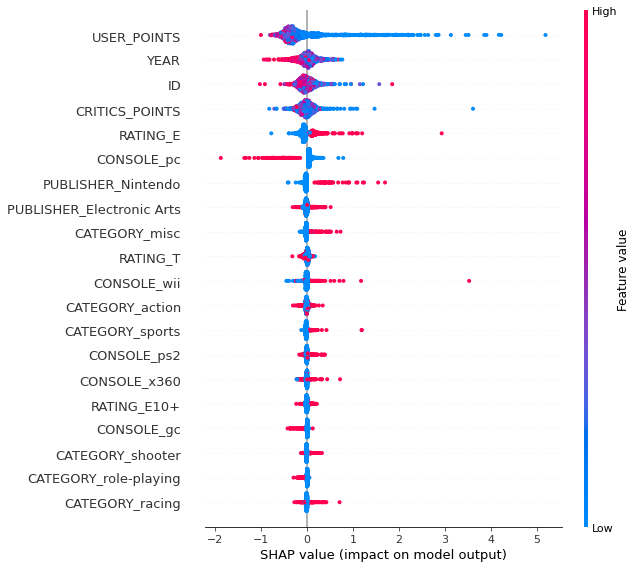

In [ ]:
interpret_model(tuned_cat)

In [ ]:
predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.175,8.294,2.8799,0.3054,0.4525,3.1465


,ID,YEAR,CRITICS_POINTS,USER_POINTS,CONSOLE_3ds,CONSOLE_dc,CONSOLE_ds,CONSOLE_gba,CONSOLE_gc,CONSOLE_pc,CONSOLE_ps,CONSOLE_ps2,CONSOLE_ps3,CONSOLE_ps4,CONSOLE_psp,CONSOLE_psv,CONSOLE_wii,CONSOLE_wiiu,CONSOLE_x,CONSOLE_x360,CONSOLE_xone,CATEGORY_action,CATEGORY_adventure,CATEGORY_fighting,CATEGORY_misc,CATEGORY_platform,CATEGORY_puzzle,CATEGORY_racing,CATEGORY_role-playing,CATEGORY_shooter,CATEGORY_simulation,CATEGORY_sports,CATEGORY_strategy,PUBLISHER_1C Company,PUBLISHER_3Do,PUBLISHER_505 Games,PUBLISHER_506 Games,PUBLISHER_5P,PUBLISHER_Acclaim Entertainment,PUBLISHER_Acquire,PUBLISHER_Activision,PUBLISHER_Activision Blizzard,PUBLISHER_Agatsuma Entertainment,PUBLISHER_Agetec,PUBLISHER_Aksys Games,PUBLISHER_Aq Interactive,PUBLISHER_Aqua Plus,PUBLISHER_Arc System Works,PUBLISHER_Ascaron Entertainment Gmbh,PUBLISHER_Ascii Entertainment,PUBLISHER_Aspyr,PUBLISHER_Atari,PUBLISHER_Atlus,PUBLISHER_Avalon Interactive,PUBLISHER_Bam! Entertainment,PUBLISHER_Banpresto,PUBLISHER_Bethesda Softworks,PUBLISHER_Bigben Interactive,PUBLISHER_Bitcomposer Games,PUBLISHER_Black Bean Games,PUBLISHER_Black Label Games,PUBLISHER_Blue Byte,PUBLISHER_Capcom,PUBLISHER_Cave,PUBLISHER_Cdv Software Entertainment,PUBLISHER_City Interactive,PUBLISHER_Cloud Imperium Games Corporation,PUBLISHER_Codemasters,PUBLISHER_Compile Heart,PUBLISHER_Crave Entertainment,PUBLISHER_Crimson Cow,PUBLISHER_D3Publisher,PUBLISHER_Deep Silver,PUBLISHER_Destination Software Inc,PUBLISHER_Destineer,PUBLISHER_Devolver Digital,PUBLISHER_Disney Interactive Studios,PUBLISHER_Dreamcatcher Interactive,PUBLISHER_Dtp Entertainment,PUBLISHER_Dusenberry Martin Racing,PUBLISHER_Ea Games,PUBLISHER_Eidos Interactive,PUBLISHER_Electronic Arts,PUBLISHER_Empire Interactive,PUBLISHER_En Masse Entertainment,PUBLISHER_Encore,PUBLISHER_Enix Corporation,PUBLISHER_Enterbrain,PUBLISHER_Evolved Games,PUBLISHER_Flashpoint Games,PUBLISHER_Focus Home Interactive,PUBLISHER_From Software,PUBLISHER_Funcom,PUBLISHER_Furyu,PUBLISHER_Game Factory,PUBLISHER_Gamebridge,PUBLISHER_Gamecock,PUBLISHER_Gaslamp Games,PUBLISHER_Gathering Of Developers,PUBLISHER_Genki,PUBLISHER_Ghostlight,PUBLISHER_Global Star,PUBLISHER_Gotham Games,PUBLISHER_Graffiti,PUBLISHER_Groove Games,PUBLISHER_Gt Interactive,PUBLISHER_Gungho,PUBLISHER_Harmonix Music Systems,PUBLISHER_Hasbro Interactive,PUBLISHER_Havas Interactive,PUBLISHER_Her Interactive,PUBLISHER_Hip Interactive,PUBLISHER_Home Entertainment Suppliers,PUBLISHER_Hudson Soft,PUBLISHER_Human Entertainment,PUBLISHER_Iceberg Interactive,PUBLISHER_Idea Factory,PUBLISHER_Ignition Entertainment,PUBLISHER_Illusion Softworks,PUBLISHER_Indie Games,PUBLISHER_Infogrames,PUBLISHER_Insomniac Games,PUBLISHER_Interplay,PUBLISHER_Jaleco,PUBLISHER_Jowood Productions,PUBLISHER_Kalypso Media,PUBLISHER_Kemco,PUBLISHER_Koch Media,PUBLISHER_Konami Digital Entertainment,PUBLISHER_Kool Kizz,PUBLISHER_Lexicon Entertainment,PUBLISHER_Little Orbit,PUBLISHER_Lucasarts,PUBLISHER_Mad Catz,PUBLISHER_Majesco Entertainment,PUBLISHER_Marvelous Entertainment,PUBLISHER_Marvelous Interactive,PUBLISHER_Mastertronic,PUBLISHER_Mastiff,PUBLISHER_Mc2 Entertainment,PUBLISHER_Metro 3D,PUBLISHER_Microids,PUBLISHER_Microsoft Game Studios,PUBLISHER_Midas Interactive Entertainment,PUBLISHER_Midway Games,PUBLISHER_Milestone S.R.L,PUBLISHER_Milestone S.R.L.,PUBLISHER_Mindscape,PUBLISHER_Monster Games,PUBLISHER_Moss,PUBLISHER_Mtv Games,PUBLISHER_Namco Bandai Games,PUBLISHER_Naturalmotion,PUBLISHER_Ncsoft,PUBLISHER_Nintendo,PUBLISHER_Nippon Ichi Software,PUBLISHER_Nobilis,PUBLISHER_Nordic Games,PUBLISHER_Novalogic,PUBLISHER_O-Games,PUBLISHER_Oovee Game Studios,PUBLISHER_Pacific Century Cyber Works,PUBLISHER_Paradox Interactive,PUBLISHER_Phantagram,PUBLISHER_Pinnacle,PUBLISHER_Play It,PUBLISHER_Playlogic Game Factory,PUBLISHER_Pm Studios,PUBLISHER_Popcap Games,PUBLISHER_Pqube,PUBLISHER_Rage Software,PUBLISHER_Rebellion,PUBLISHER_Rebellion Developments,PUBLISHER_Redoctane,PUBLISHER_Revolution Software,PUBLISHER_Rising Star Games,PUBLISH

In [ ]:
final_cat= finalize_model(tuned_cat)
print(final_cat)

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Test.csv to Test (1).csv
User uploaded file "Test.csv" with length 106025 bytes


In [ ]:
test= pd.read_csv("Test.csv")
test.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333


In [ ]:
test_predictions= predict_model(final_cat, data= test)
test_predictions.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,Label
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353,1.6083
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795,2.6595
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044,4.6295
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000,2.8457
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333,1.2321


In [ ]:
save_model(final_cat, "final cat Model game")

Transformation Pipeline and Model Succesfully Saved


In [ ]:
saved_final_cat = load_model("final cat Model game")

Transformation Pipeline and Model Sucessfully Loaded


In [ ]:
new_prediction= predict_model(saved_final_cat, data= test)
new_prediction.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,Label
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353,1.6083
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795,2.6595
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044,4.6295
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000,2.8457
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333,1.2321
